In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno 
df = pd.read_csv("data.csv", skiprows = 41)
#df.head(5)

In [61]:
# Drop invalid data 
df = df.drop(df[(df.PSAL < 2)].index)
df = df.drop(df[(df.PSAL > 41)].index)
#len(df)
df = df.drop(df[(df.CPHL < 0)].index)
df = df.drop(df[(df.CPHL > 100)].index)
#len(df)
df = df.drop(df[(df.CDOM < 0)].index)
df = df.drop(df[(df.CDOM > 400)].index)
#len(df)
df = df.drop(df[(df.VBSC < 0)].index)
df = df.drop(df[(df.VBSC > 0.1)].index)
#len(df)
df = df.drop(df[(df.IRRAD555 < 0) ].index)
df = df.drop(df[(df.IRRAD555 > 1000)].index)
len(df)

3101188

In [62]:
# There are 7 different delployment in total
name=df.deployment_name.unique()
print(name)

['TwoRocks20130215' 'Leeuwin20131017' 'AIMS20151127'
 'LizardIsland20131024' 'SpencerGulf20131031' 'TwoRocks20140808'
 'StormBay20141017']


In [113]:
# Delete invalid columns VCUR,UCUR and NTRA
Two_13 = df[df['deployment_name'] == 'TwoRocks20130215']
del Two_13['NTRA']
del Two_13['UCUR']
del Two_13['VCUR']

from numpy import where
from netCDF4 import Dataset, num2date
from matplotlib.pyplot import figure, xlabel, ylabel, title, show


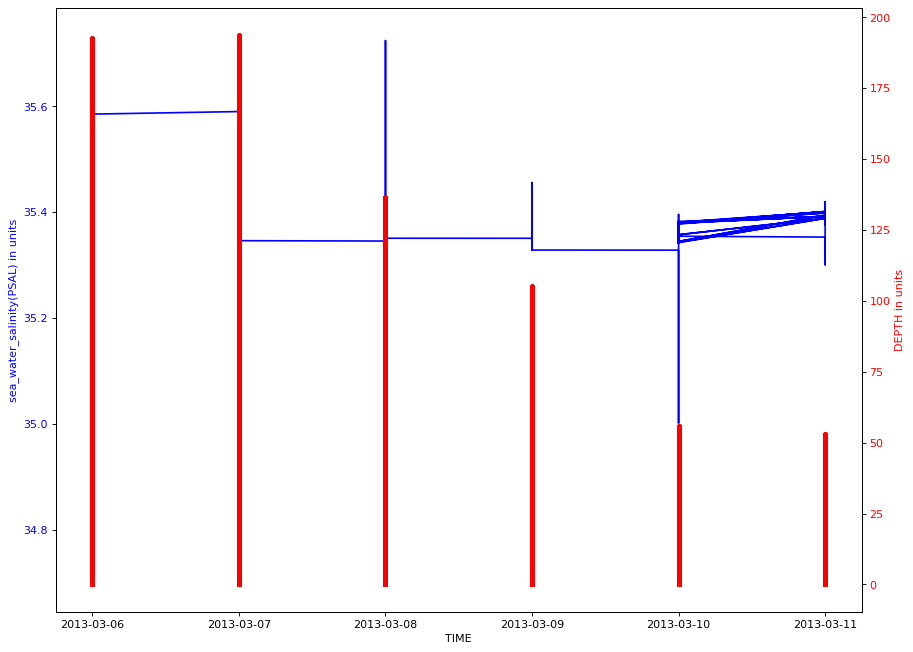

In [64]:
# Extract variable values and convert the time values into an array of datetime objects
TIME = pd.to_datetime(Two_13['TIME']).dt.date.values
psalData = Two_13['PSAL'].values
depthData = Two_13['DEPTH'].values

# plot depth and salinity(psal) timeseries
figure1 = figure( figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

ax1 = figure1.add_subplot(111)
ax1.plot(TIME,psalData, 'b-')
ax1.set_xlabel('TIME')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('sea_water_salinity(PSAL)' + ' in units', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(TIME,depthData, 'r.')
ax2.set_ylabel('DEPTH' + ' in units', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

show()

In [114]:
# PSAL
# The ratio of good PSAL data over total data is pretty high, and the ratio of bad PSAL data over good PSAL data 
# is pretty small, thus we could only keep the good PSQL data

# Find the unique value in PSAL_quality_control
psalQ = Two_13.PSAL_quality_control.unique()
print(psalQ)

# The good data for PSAL
psalValid=Two_13.loc[df['PSAL_quality_control'] == 1.]
psalMissing=Two_13.loc[df['PSAL_quality_control'] == 9.]
psalInvalid = Two_13.loc[df['PSAL_quality_control'] != 1.]
print("the ratio of good quality data v.s. total data is",round(len(psalValid)/len(Two_13),3))
print("the ratio of bad quality data v.s. good quality(including missing) is",round(len(psalInvalid)/len(psalValid),3))

# Update the Two_13 with psal good quality data only
Two_13 = psalValid

[1. 3. 9.]
the ratio of good quality data v.s. total data is 0.997
the ratio of bad quality data v.s. good quality(including missing) is 0.003


In [115]:
# PROFILE:glider_trajectory_profile_number
proQ = Two_13.PROFILE_quality_control.unique()
print('the quality type of PROFILE are',proQ)
proQMissing=Two_13.loc[df['PROFILE_quality_control'] == 9.] # Missing profile data
proQValid=Two_13.loc[df['PROFILE_quality_control'] == 0.]
print("The number of data with missing profile value is",len(proQMissing))

# Only 3 missing values, so we could use only valid data, Update the Two_13 with non missing profile data only
Two_13 = proQValid


the quality type of PROFILE are [0. 9.]
The number of data with missing profile value is 3


In [116]:
# DOX2:standard_name: moles_of_oxygen_per_unit_mass_in_sea_water
do2 = Two_13.DOX2_quality_control.unique()
print('the quality type of DOX2 are',do2)
do2bad=Two_13.loc[df['DOX2_quality_control'] == 3.]
print('the number of bad_data_that_are_potentially_correctable for DOX2',len(do2bad),', and the pecentage is',round(len(do2bad)/len(Two_13),4)*100,'%')
# #update Two_13
# Two_13 = Two_13[(Two_13['DOX2_quality_control'] != 4.)]
do2missing = Two_13.loc[df['DOX2_quality_control'] == 9.]
print('number of missing value is:',len(do2missing),'and the pecentage is',round(len(do2missing)/len(Two_13),4)*100,'%')
# do2missing.head(5)

the quality type of DOX2 are [3. 9.]
the number of bad_data_that_are_potentially_correctable for DOX2 178889 , and the pecentage is 88.66000000000001 %
number of missing value is: 22883 and the pecentage is 11.34 %


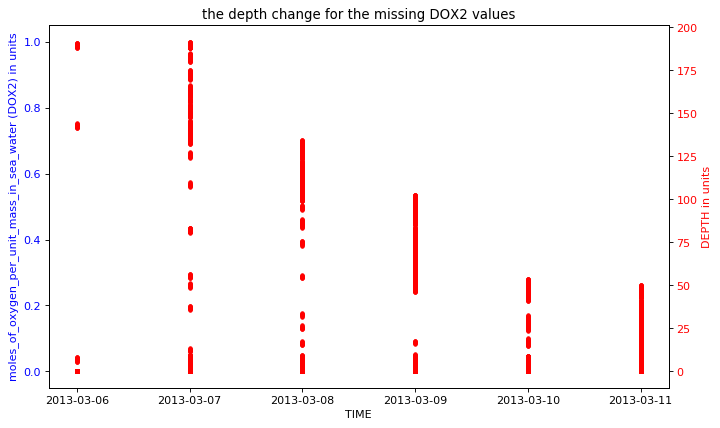

In [68]:
# Extract variable values and convert the time values into an array of datetime objects
TIME = pd.to_datetime(do2missing['TIME']).dt.date.values
do2Data = do2missing['DOX2'].values
depthData = do2missing['DEPTH'].values

# plot depth and DOX2 missing value timeseries
figure1 = figure( figsize=(10,6 ), dpi=80, facecolor='w', edgecolor='k')

ax1 = figure1.add_subplot(111)
ax1.plot(TIME,do2Data, 'b-')
ax1.set_xlabel('TIME')
ax1.set_title('the depth change for the missing DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(TIME,depthData, 'r.')
ax2.set_ylabel('DEPTH' + ' in units', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

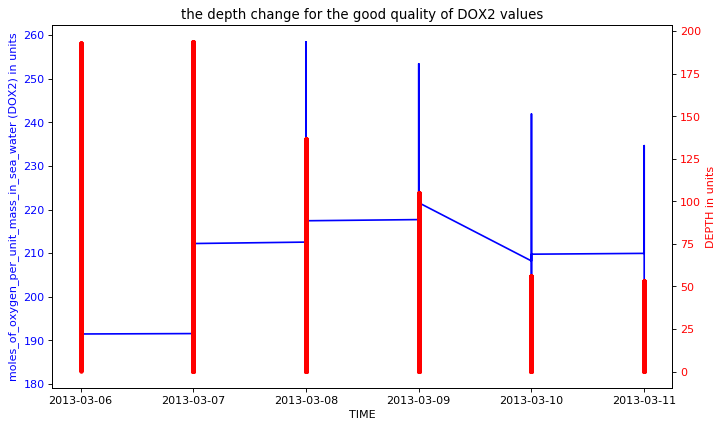

In [69]:
# good quality DOX2
do2Valid=Two_13.loc[df['DOX2_quality_control'] == 3.]
TIME = pd.to_datetime(do2Valid['TIME']).dt.date.values
do2vData = do2Valid['DOX2'].values
depthvData = do2Valid['DEPTH'].values

# plot depth and DOX2 good quality data timeseries
figure2 = figure( figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

ax3 = figure2.add_subplot(111)
ax3.plot(TIME,do2vData, 'b-')
ax3.set_xlabel('TIME')
ax3.set_title('the depth change for the good quality of DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax3.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for t3 in ax3.get_yticklabels():
    t3.set_color('b')

ax4 = ax3.twinx()
ax4.plot(TIME,depthvData, 'r.')
ax4.set_ylabel('DEPTH' + ' in units', color='r')
for t4 in ax4.get_yticklabels():
    t4.set_color('r')

show()

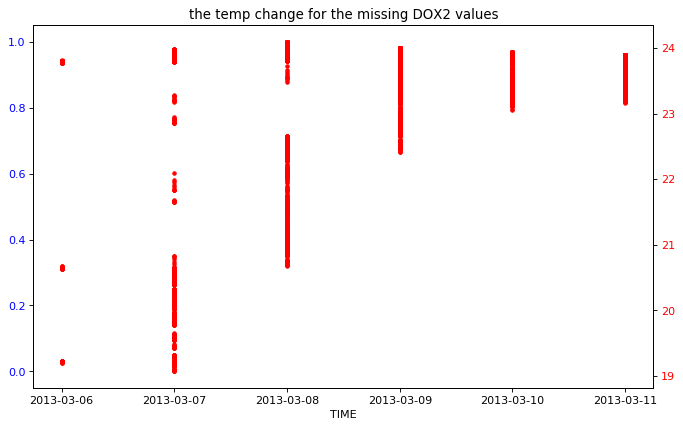

In [70]:
# Extract variable values and convert the time values into an array of datetime objects
TIME = pd.to_datetime(do2missing['TIME']).dt.date.values
do2Data = do2missing['DOX2'].values
tempData = do2missing['TEMP'].values

# plot depth and DOX2 missing value timeseries
figure3 = figure( figsize=(10,6 ), dpi=80, facecolor='w', edgecolor='k')

ax5 = figure3.add_subplot(111)
ax5.plot(TIME,do2Data, 'b-')
ax5.set_xlabel('TIME')
ax5.set_title('the temp change for the missing DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for tl in ax5.get_yticklabels():
    tl.set_color('b')

ax6 = ax5.twinx()
ax6.plot(TIME,tempData, 'r.')
ax2.set_ylabel('TEMP' + ' in units', color='r')
for tl in ax6.get_yticklabels():
    tl.set_color('r')
    

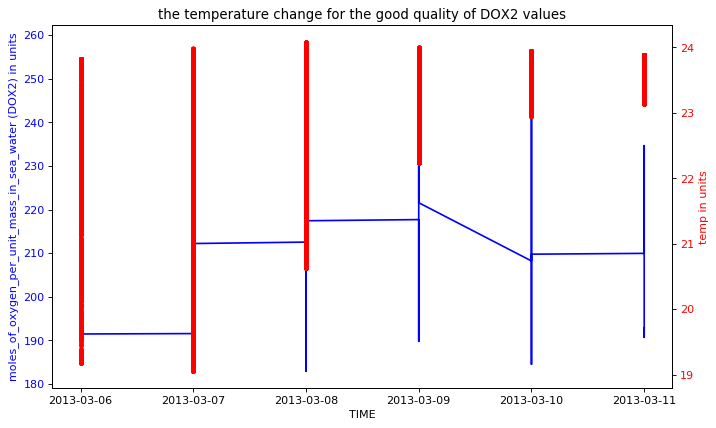

In [71]:
# good quality DOX2
do2Valid=Two_13.loc[df['DOX2_quality_control'] == 3.]
TIME = pd.to_datetime(do2Valid['TIME']).dt.date.values
do2vData = do2Valid['DOX2'].values
tempvData = do2Valid['TEMP'].values

# plot depth and DOX2 good quality data timeseries
figure4 = figure( figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

ax6 = figure4.add_subplot(111)
ax6.plot(TIME,do2vData, 'b-')
ax6.set_xlabel('TIME')
ax6.set_title('the temperature change for the good quality of DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax6.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for t3 in ax6.get_yticklabels():
    t3.set_color('b')

ax7 = ax6.twinx()
ax7.plot(TIME,tempvData, 'r.')
ax7.set_ylabel('temp' + ' in units', color='r')
for t4 in ax7.get_yticklabels():
    t4.set_color('r')

show()

In [72]:
# corr plot for each variable, select those with corr>0.5 as training features
corr = do2Valid.corr() 
#corr = corr[(corr.abs()>0.3)] #& (corr.abs()<1.0)]#.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm')

/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax
/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,file_id,TIME_quality_control,LATITUDE,LATITUDE_quality_control,LONGITUDE,LONGITUDE_quality_control,PRES,PRES_quality_control,DEPTH,DEPTH_quality_control,PROFILE,PROFILE_quality_control,PHASE,PHASE_quality_control,TEMP,TEMP_quality_control,PSAL,PSAL_quality_control,DOX1,DOX1_quality_control,DOX2,DOX2_quality_control,CPHL,CPHL_quality_control,CDOM,CDOM_quality_control,CNDC,CNDC_quality_control,VBSC,VBSC_quality_control,NTRA_quality_control,UCUR_quality_control,VCUR_quality_control,HEAD,HEAD_quality_control,UCUR_GPS,UCUR_GPS_quality_control,VCUR_GPS,VCUR_GPS_quality_control,IRRAD443,IRRAD443_quality_control,IRRAD490,IRRAD490_quality_control,IRRAD555,IRRAD555_quality_control,IRRAD670,IRRAD670_quality_control
file_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TIME_quality_control,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
LATITUDE,nan,nan,1.000000,-0.002483,0.608457,-0.002483,-0.462163,nan,-0.462135,nan,0.068574,nan,0.019277,nan,0.462038,nan,-0.372232,nan,0.037888,nan,0.040715,nan,0.143773,-0.001332,-0.205706,-0.001332,0.464566,nan,-0.000007,0.831324,nan,nan,nan,0.300282,0.001764,nan,nan,nan,nan,-0.048977,-0.024075,-0.053470,-0.024075,-0.045164,-0.024075,-0.028088,-0.024075
LATITUDE_quality_control,nan,nan,-0.002483,1.000000,-0.002244,1.000000,0.086665,nan,0.086678,nan,-0.014625,nan,0.079142,nan,-0.041554,nan,0.036353,nan,-0.010199,nan,-0.015725,nan,0.054052,-0.192473,-0.008265,-0.192473,-0.040723,nan,-0.219137,-0.011804,nan,nan,nan,-0.068707,0.002234,nan,nan,nan,nan,-0.066833,-0.079681,-0.064969,-0.079682,-0.120680,-0.079682,-0.356773,-0.079682
LONGITUDE,nan,nan,0.608457,-0.002244,1.000000,-0.002244,-0.552090,nan,-0.552083,nan,0.134646,nan,0.022791,nan,0.451148,nan,-0.326003,nan,0.030167,nan,0.034274,nan,0.060703,-0.001685,-0.144845,-0.001685,0.454684,nan,0.300390,0.691236,nan,nan,nan,0.032165,-0.002420,nan,nan,nan,nan,0.109688,-0.032019,0.084894,-0.032029,0.064975,-0.032029,0.001339,-0.032029
LONGITUDE_quality_control,nan,nan,-0.002483,1.000000,-0.002244,1.000000,0.086665,nan,0.086678,nan,-0.014625,nan,0.079142,nan,-0.041554,nan,0.036353,nan,-0.010199,nan,-0.015725,nan,0.054052,-0.192473,-0.008265,-0.192473,-0.040723,nan,-0.219137,-0.011804,nan,nan,nan,-0.068707,0.002234,nan,nan,nan,nan,-0.066833,-0.079681,-0.064969,-0.079682,-0.120680,-0.079682,-0.356773,-0.079682
PRES,nan,nan,-0.462163,0.086665,-0.552090,0.086665,1.000000,nan,1.000000,nan,-0.117036,nan,0.010108,nan,-0.900519,nan,0.787313,nan,-0.418754,nan,-0.401123,nan,0.280227,-0.033281,0.320975,-0.033281,-0.899114,nan,-0.234762,-0.503876,nan,nan,nan,-0.121056,0.006592,nan,nan,nan,nan,-0.324571,-0.008341,-0.320355,-0.008336,-0.293580,-0.008336,-0.122537,-0.008336
PRES_quality_control,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DEPTH,nan,nan,-0.462135,0.086678,-0.552083,0.086678,1.000000,nan,1.000000,nan,-0.117031,nan,0.010114,nan,-0.900474,nan,0.787253,nan,-0.418770,nan,-0.401142,nan,0.280301,-0.033287,0.320974,-0.033287,-0.899070,nan,-0.234779,-0.503858,nan,nan,nan,-0.121042,0.006594,nan,nan,nan,nan,-0.324598,-0.008346,-0.320381,-0.008341,-0.293613,-0.008341,-0.122555,-0.008341
DEPTH_quality_control,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [117]:
# Data Imputation for DOX2

# Train-test split
# Select features with corr>0.3, PROFILE is a exception, and deleted DEPTH because of the missing value 
X = do2Valid[['PRES','TEMP','PSAL','CNDC','PROFILE','IRRAD443','IRRAD490','IRRAD555','IRRAD670']]
# Target value
y = do2Valid['DOX2'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Import knn 
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
model = knn.fit(X_train,y_train.astype('int'))
y_pred = knn.predict(X_test)

# Test the accuracy score of the model
from sklearn.metrics import accuracy_score
print('the accuracy of testing data on DOX2 is:',accuracy_score(y_test.astype('int'), y_pred))

the accuracy of testing data on DOX2 is: 0.8528704790653474


In [118]:
missing_dox2= do2missing['DOX2']
#predict the DOX2 value for the whole Two_13 dataset
df_missing_dox2 = pd.DataFrame(Two_13[['PRES','PROFILE','TEMP','PSAL','CNDC','IRRAD443','IRRAD490','IRRAD555','IRRAD670']])
imputed_dox2 = model.predict(df_missing_dox2)
print('the array of knn prediction:',imputed_dox2)

the array of knn prediction: [209 209 209 ... 209 209 209]


In [119]:
# Filling the missing values with knn imputation result
indicies_of_missing = Two_13[Two_13['DOX2'].isnull()].index # list of the missing indices
Two_13.head(5)
for fill_index, dataframe_index in enumerate(indicies_of_missing):
    if pd.isnull(Two_13.loc[dataframe_index, 'DOX2']):
        Two_13.loc[dataframe_index,'DOX2'] = imputed_dox2[fill_index]
    else:
        continue

/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [120]:
print("the number of missing DOX2 after imputation is", Two_13['DOX2'].isnull().sum())
# Data imputataion for DOX2 done

the number of missing DOX2 after imputation is 0


In [121]:
#VBSC: volume_scattering_function
vbscQ = Two_13.VBSC_quality_control.unique() 
print(vbscQ)
vbscBad=Two_13.loc[df['VBSC_quality_control'] == 4.]
print('the number of bad_data for VBSC',len(vbscBad),', and the pecentage is',round(len(vbscBad)/len(Two_13),4)*100,'%')
# Drop bad data and update Two_13
Two_13 = Two_13[(Two_13['VBSC_quality_control'] != 4.)]

[1. 4. 3.]
the number of bad_data for VBSC 15228 , and the pecentage is 7.55 %


In [122]:
# IRRAD443 downwelling_spectral_irradiance_in_sea_water_beam1

ir443Q = Two_13.IRRAD443_quality_control.unique()
print('type of IRRAD443',ir443Q) 

ir443bad=Two_13.loc[df['IRRAD443_quality_control'] == 4.]
print('the number of bad data for IRRAD443',len(ir443bad),', and the pecentage is',round(len(ir443bad)/len(Two_13),4)*100,'%')
# Drop bad data and update Two_13
Two_13 = Two_13[(Two_13['IRRAD443_quality_control'] != 4.)]

type of IRRAD443 [4. 1.]
the number of bad data for IRRAD443 87365 , and the pecentage is 46.83 %


In [123]:
# IRRAD490 downwelling_spectral_irradiance_in_sea_water_beam2
ir490Q = Two_13.IRRAD490_quality_control.unique()
print('type of IRRAD490',ir490Q) 
# For IRRAD490, they are all good data

type of IRRAD490 [1.]


In [124]:
# IRRAD555 downwelling_spectral_irradiance_in_sea_water_beam3
ir555Q = Two_13.IRRAD555_quality_control.unique()
print('type of IRRAD555',ir555Q) 
# For IRRAD555, they are all good data

type of IRRAD555 [1.]


In [125]:
# IRRAD670 downwelling_spectral_irradiance_in_sea_water_beam4
ir670Q = Two_13.IRRAD670_quality_control.unique()
print('type of IRRAD670',ir670Q) 
# For IRRAD670, they are all good data

type of IRRAD670 [1.]


In [126]:
del Two_13['NTRA_quality_control']
del Two_13['UCUR_quality_control']
del Two_13['VCUR_quality_control']
#UCUR can only be calculated when the glider is close to the surface and gets an updated GPS fix
#Thus UCUR_GPS and VCUR_GPS null value can be deleted

del Two_13['UCUR_GPS']
del Two_13['UCUR_GPS_quality_control']
del Two_13['VCUR_GPS']
del Two_13['VCUR_GPS_quality_control']
print(Two_13.isnull().sum())
# LATITUDE, LONGITUDE, DEPTH, HEAD, geom still have null value

FID                            0
file_id                        0
deployment_name                0
platform_type                  0
platform_code                  0
time_coverage_start            0
time_coverage_end              0
TIME                           0
TIME_quality_control           0
LATITUDE                     107
LATITUDE_quality_control       0
LONGITUDE                    107
LONGITUDE_quality_control      0
PRES                           0
PRES_quality_control           0
DEPTH                        109
DEPTH_quality_control          0
PROFILE                        0
PROFILE_quality_control        0
PHASE                          0
PHASE_quality_control          0
TEMP                           0
TEMP_quality_control           0
PSAL                           0
PSAL_quality_control           0
DOX1                           0
DOX1_quality_control           0
DOX2                           0
DOX2_quality_control           0
CPHL                           0
CPHL_quali

In [127]:
# HEAD: vehicle_heading
headQ = Two_13.HEAD_quality_control.unique()
print('type of HEAD',headQ) 
head_missing=Two_13.loc[df['HEAD_quality_control'] == 9.]
print('the number of missing data for HEAD',len(head_missing),', and the pecentage is',round(len(head_missing)/len(Two_13),4)*100,'%')
# Only a small number of HEAD is missing, we could just delete them.
# Drop missing value for HEAD and update Two_13
Two_13 = Two_13[(Two_13['HEAD_quality_control'] != 9.)]

type of HEAD [0. 9.]
the number of missing data for HEAD 74 , and the pecentage is 0.06999999999999999 %


In [129]:
# LATITUDE
latitudeQ = Two_13.LATITUDE_quality_control.unique()
print('type of LATITUDE',latitudeQ) 
latitude_missing=Two_13.loc[df['LATITUDE_quality_control'] == 9.]
print('the number of missing data for LATITUDE',len(latitude_missing),', and the pecentage is',round(len(latitude_missing)/len(Two_13),4)*100,'%')
# Only a small number of LATITUDE is missing, we could just delete them.
# Drop missing value for LATITUDE and update Two_13
Two_13 = Two_13[(Two_13['LATITUDE_quality_control'] != 9.)]

type of LATITUDE [8. 1. 9.]
the number of missing data for LATITUDE 107 , and the pecentage is 0.11 %


In [130]:
print(Two_13.isnull().sum())
# Only Two missing value from DEPTH

FID                          0
file_id                      0
deployment_name              0
platform_type                0
platform_code                0
time_coverage_start          0
time_coverage_end            0
TIME                         0
TIME_quality_control         0
LATITUDE                     0
LATITUDE_quality_control     0
LONGITUDE                    0
LONGITUDE_quality_control    0
PRES                         0
PRES_quality_control         0
DEPTH                        2
DEPTH_quality_control        0
PROFILE                      0
PROFILE_quality_control      0
PHASE                        0
PHASE_quality_control        0
TEMP                         0
TEMP_quality_control         0
PSAL                         0
PSAL_quality_control         0
DOX1                         0
DOX1_quality_control         0
DOX2                         0
DOX2_quality_control         0
CPHL                         0
CPHL_quality_control         0
CDOM                         0
CDOM_qua

In [133]:
# DEPTH
depthQ = Two_13.DEPTH_quality_control.unique()
print('type of DEPTH',depthQ) 
depth_missing=Two_13.loc[df['DEPTH_quality_control'] == 9.]
print('the number of missing data for DEPTH',len(depth_missing),', and the pecentage is',round(len(depth_missing)/len(Two_13),4)*100,'%')
# Only a small number of DEPTH is missing, we could just delete them.
# Drop missing value for DEPTH and update Two_13
Two_13 = Two_13[(Two_13['DEPTH_quality_control'] != 9.)]

type of DEPTH [1. 9.]
the number of missing data for DEPTH 2 , and the pecentage is 0.0 %


In [134]:
print(Two_13.isnull().sum())
# Now, no more missing values

FID                          0
file_id                      0
deployment_name              0
platform_type                0
platform_code                0
time_coverage_start          0
time_coverage_end            0
TIME                         0
TIME_quality_control         0
LATITUDE                     0
LATITUDE_quality_control     0
LONGITUDE                    0
LONGITUDE_quality_control    0
PRES                         0
PRES_quality_control         0
DEPTH                        0
DEPTH_quality_control        0
PROFILE                      0
PROFILE_quality_control      0
PHASE                        0
PHASE_quality_control        0
TEMP                         0
TEMP_quality_control         0
PSAL                         0
PSAL_quality_control         0
DOX1                         0
DOX1_quality_control         0
DOX2                         0
DOX2_quality_control         0
CPHL                         0
CPHL_quality_control         0
CDOM                         0
CDOM_qua

In [136]:
#----------'TwoRocks20130808'---------  output the rawdata as CSV
Two_13.to_csv (r'TwoRocks20130215.csv', index = False, header=True)
print (Two_13)

                                                      FID  file_id  \
550     anfog_dm_trajectory_data.fid-7f408395_174917ab...      185   
551     anfog_dm_trajectory_data.fid-7f408395_174917ab...      185   
552     anfog_dm_trajectory_data.fid-7f408395_174917ab...      185   
553     anfog_dm_trajectory_data.fid-7f408395_174917ab...      185   
554     anfog_dm_trajectory_data.fid-7f408395_174917ab...      185   
...                                                   ...      ...   
202716  anfog_dm_trajectory_data.fid-7f408395_174917ec...      185   
202717  anfog_dm_trajectory_data.fid-7f408395_174917ec...      185   
202718  anfog_dm_trajectory_data.fid-7f408395_174917ec...      185   
202719  anfog_dm_trajectory_data.fid-7f408395_174917ec...      185   
202721  anfog_dm_trajectory_data.fid-7f408395_174917ec...      185   

         deployment_name  platform_type platform_code   time_coverage_start  \
550     TwoRocks20130215  slocum glider         SL248  2013-02-15T03:13:29Z   
5